In [53]:
import tensorflow as tf

In [54]:
print(tf.__version__)

2.11.0


In [55]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
import os 
path = os.getcwd()
path = path + "\\dataset"

In [57]:
# Importing the dataset
dataset = pd.read_csv(path+'\\Churn_Modelling.csv')

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
## divide into dependent and independent features
# removing rownumber, customerid, and surname as they won't provide any value
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [59]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [60]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Feature engineering

In [61]:
X.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [62]:
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [63]:
# One heat encoding
geography=pd.get_dummies(X["Geography"])
gender=pd.get_dummies(X['Gender'])

In [64]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [65]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

- Standardscaler is based on z-score. so mean = 0, std =1 .
- Min-max scaler scales the values between 0 to 1. Usually used with CNN

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

.fit_transform with training set 
.transform with test set

In [67]:
# Part 2 - Now let's make the ANN!

- Sequential: forward and backward propagation carried out
- Dense: ?
- LeakyReLU, PreELU, ELU are activation functions
- Dropout: to counteract overfitting; similar to regularization parameter.

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [69]:
# Initialising the ANN
classifier = Sequential()

There are techniques to decide how many units we need per layer

In [70]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [71]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [72]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

as it is a binomial classification, the output layer should be sigmoid activation and loss function should be binary cross entropy

In [73]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

by default adam uses a learning rate of 0.01

In [74]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
# to change learning rate
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.8914 - val_loss: 0.4304 - val_accuracy: 0.8406
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.8890 - val_loss: 0.4274 - val_accuracy: 0.8429
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8914 - val_loss: 0.4251 - val_accuracy: 0.8398
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2722 - accuracy: 0.8918 - val_loss: 0.4269 - val_accuracy: 0.8383
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2719 - accuracy: 0.8905 - val_loss: 0.4289 - val_accuracy: 0.8387
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2726 - accuracy: 0.8897 - val_loss: 0.4290 - val_accuracy: 0.8353
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.8905 - val_loss: 0.4263 - val_accuracy:

KeyboardInterrupt: 

In [80]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


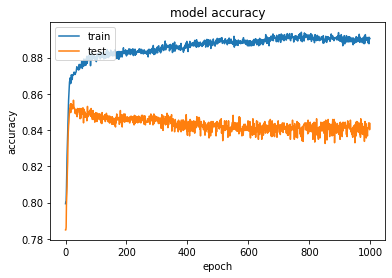

In [81]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

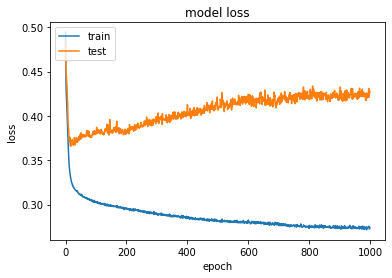

In [82]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [89]:
## Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [90]:
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.8918 - val_loss: 0.4268 - val_accuracy: 0.8383
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.8897 - val_loss: 0.4298 - val_accuracy: 0.8429
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2710 - accuracy: 0.8903 - val_loss: 0.4331 - val_accuracy: 0.8429
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.8905 - val_loss: 0.4273 - val_accuracy: 0.8421
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2714 - accuracy: 0.8908 - val_loss: 0.4283 - val_accuracy: 0.8402
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2708 - accuracy: 0.8918 - val_loss: 0.4295 - val_accuracy: 0.8387
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.8920 - val_loss: 0.4224 - val_accuracy:

In [92]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

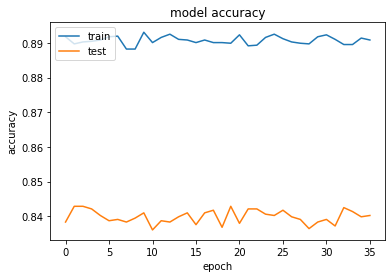

In [93]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

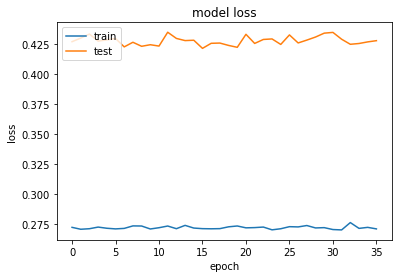

In [94]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [96]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   88],
       [ 229,  171]], dtype=int64)

In [97]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [98]:
score

0.8415